<a href="https://colab.research.google.com/github/Bella-cell/VAE/blob/main/Capstone_Lilo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import module
##### Import necessary module and mount the drive

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [90]:
!pip install --upgrade pip

In [91]:
!pip install scikit-fda

In [92]:
!pip install Gpy

In [93]:
import GPy
import skfda

In [154]:
from skfda.datasets import fetch_growth
from skfda.exploratory.visualization import FPCAPlot
from skfda.exploratory.visualization.representation import GraphPlot
from skfda.representation.basis import BSpline, Fourier, Monomial, FDataBasis
from skfda.representation.grid import FDataGrid

In [95]:
from skfda.preprocessing.dim_reduction.feature_extraction import FPCA


In [96]:
!pip install FDApy

#### Import dataset

In [108]:
data = pd.read_csv('/drive/My Drive/Colab Notebooks/Itr_6.csv')

In [109]:
data.head()

,Wavelength,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0,400,0.054,0.323,0.043,0.541,0.372,0.836,0.402,0.402,0.267,...,0.424,0.442,0.460,0.404,0.555,0.512,0.524,0.401,0.445,0.510
1,405,0.053,0.319,0.043,0.535,0.368,0.795,0.397,0.398,0.264,...,0.420,0.437,0.456,0.400,0.549,0.506,0.518,0.397,0.440,0.504
2,410,0.053,0.316,0.043,0.530,0.365,0.740,0.394,0.394,0.262,...,0.415,0.433,0.451,0.396,0.543,0.501,0.513,0.393,0.436,0.499
3,415,0.052,0.313,0.042,0.526,0.361,0.674,0.391,0.390,0.259,...,0.412,0.429,0.447,0.393,0.538,0.496,0.508,0.390,0.432,0.494
4,420,0.052,0.310,0.042,0.522,0.358,0.606,0.388,0.387,0.257,...,0.409,0.426,0.444,0.390,0.534,0.492,0.504,0.387,0.428,0.489


In [116]:
data.keys()

Index(['Wavelength', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10', 'A11', 'A12', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8',
       'B9', 'B10', 'B11', 'B12', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
       'C8', 'C9', 'C10', 'C11', 'C12', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6',
       'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E1', 'E2', 'E3', 'E4', 'E5',
       'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F1', 'F2', 'F3', 'F4',
       'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G1', 'G2', 'G3',
       'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'H1', 'H2',
       'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12'],
      dtype='object')

In [117]:
temp_data = data.loc[:, ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10', 'A11', 'A12', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8',
       'B9', 'B10', 'B11', 'B12', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
       'C8', 'C9', 'C10', 'C11', 'C12', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6',
       'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E1', 'E2', 'E3', 'E4', 'E5',
       'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F1', 'F2', 'F3', 'F4',
       'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G1', 'G2', 'G3',
       'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'H1', 'H2',
       'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12']]

In [118]:
temp_data.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0,0.054,0.323,0.043,0.541,0.372,0.836,0.402,0.402,0.267,0.458,...,0.424,0.442,0.460,0.404,0.555,0.512,0.524,0.401,0.445,0.510
1,0.053,0.319,0.043,0.535,0.368,0.795,0.397,0.398,0.264,0.453,...,0.420,0.437,0.456,0.400,0.549,0.506,0.518,0.397,0.440,0.504
2,0.053,0.316,0.043,0.530,0.365,0.740,0.394,0.394,0.262,0.449,...,0.415,0.433,0.451,0.396,0.543,0.501,0.513,0.393,0.436,0.499
3,0.052,0.313,0.042,0.526,0.361,0.674,0.391,0.390,0.259,0.445,...,0.412,0.429,0.447,0.393,0.538,0.496,0.508,0.390,0.432,0.494
4,0.052,0.310,0.042,0.522,0.358,0.606,0.388,0.387,0.257,0.442,...,0.409,0.426,0.444,0.390,0.534,0.492,0.504,0.387,0.428,0.489


In [355]:
fd = FDataBasis.from_data(temp_data.T, grid_points = data['Wavelength'], basis = basis)

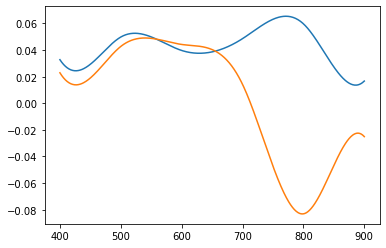

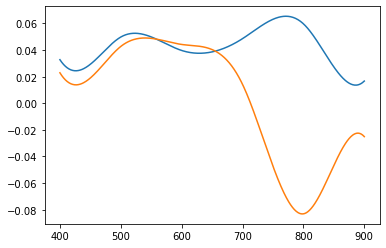

In [346]:
fpca_discretized = FPCA(n_components=2)
fpca_discretized.fit(fd)
fpca_discretized.components_.plot()

In [357]:
#Data Preprocess to basis
n_basis = 8
basis = skfda.representation.basis.BSpline(n_basis=n_basis)
basis_fd = fd.to_basis(basis)

####

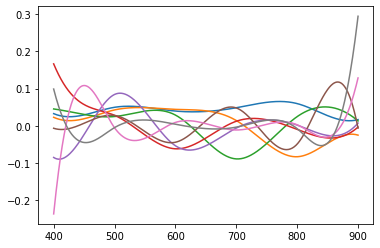

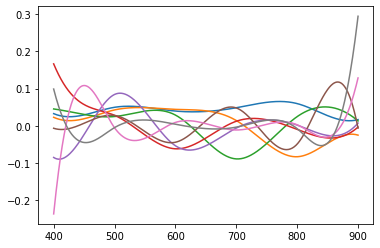

In [364]:
#Adjust components number here
n_components=8
fpca = FPCA(n_components=n_components)
fpca.fit(basis_fd)
fpca.components_.plot()

In [365]:
basis_fd.mean()

FDataBasis(
    basis=BSpline(domain_range=((400.0, 900.0),), n_basis=8, order=4, knots=(400.0, 500.0, 600.0, 700.0, 800.0, 900.0)),
    coefficients=[[0.44777155 0.16802546 0.62416931 0.25101955 0.32884611 0.41546568
      0.07149783 0.14237891]],
    dataset_name=None,
    argument_names=(None,),
    coordinate_names=(None,),
    extrapolation=None)

In [366]:
fpca.components_

FDataBasis(
    basis=BSpline(domain_range=((400.0, 900.0),), n_basis=8, order=4, knots=(400.0, 500.0, 600.0, 700.0, 800.0, 900.0)),
    coefficients=[[ 0.03276231  0.00963664  0.07246816  0.03071931  0.04285618  0.08941038
       0.00176414  0.01669418]
     [ 0.02292355 -0.00185223  0.06319988  0.03797829  0.05018257 -0.15346024
      -0.0078871  -0.02508796]
     [ 0.04535384  0.03790998  0.002046    0.08570448 -0.17129465  0.06580452
       0.05963646  0.01307542]
     [ 0.16653582  0.03558022  0.06816218 -0.12257411  0.0512731  -0.00874234
      -0.05209376 -0.00334253]
     [-0.08501265 -0.12063174  0.23773461 -0.14529974  0.02207396  0.02061554
      -0.05491892  0.00738274]
     [-0.00655665 -0.024422    0.09592874 -0.13191595  0.1667164  -0.24658163
       0.26789061 -0.00623006]
     [-0.2368295   0.29816766 -0.15530691  0.06467437 -0.04861984  0.06262606
      -0.10298867  0.12869584]
     [ 0.0988591  -0.11402831  0.04012967  0.00180218 -0.02200718  0.06516419
      -0.1677

 /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
 /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning:Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
 /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

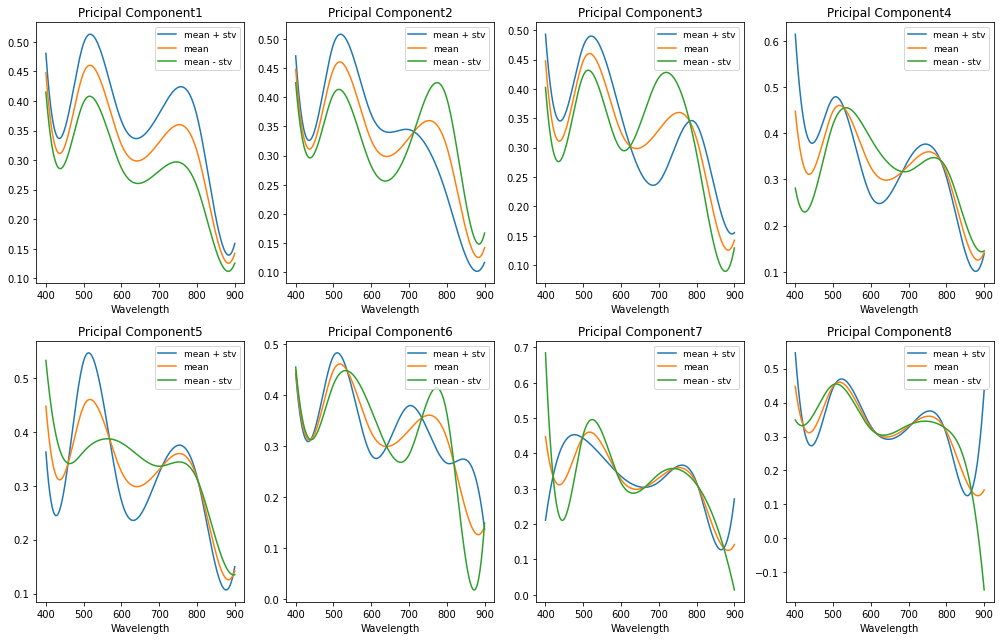

In [367]:
fig = plt.figure(figsize = (14, 9))
fontsize = 10
for i in range(n_components):
    ax = fig.add_subplot(2,4,i+1)
    each_p_components = fpca.components_.coefficients[i]
    each_fdb = FDataBasis(
        basis=BSpline(domain_range=((400.0, 900.0),), n_basis=8, order=4, knots=(400.0, 500.0, 600.0, 700.0, 800.0, 900.0)),
        coefficients=each_p_components, 
        dataset_name=None,
        argument_names=(None,),
        coordinate_names=(None,),
        extrapolation=None)
    GraphPlot(basis_fd.mean()+each_fdb, axes = ax, label = 'mean + stv').plot()
    GraphPlot(basis_fd.mean(), axes = plt.subplot(2,4,i+1), label = 'mean').plot()
    GraphPlot(basis_fd.mean()-each_fdb, axes = plt.subplot(2,4,i+1), label = 'mean - stv').plot()
    ax.set_title('Pricipal Component' + str(i+1))
    ax.set_xlabel('Wavelength', fontsize=fontsize)
    plt.legend(loc = 'upper right', fontsize = 9)
plt.tight_layout()